# Selección y limpieza de datos 
## Juan Manuel González Ascencio
## Diana Gonzalez Munguia
## Sebastián Romero Velasco
## Jaime Ernesto Aguilar Trejo

------
### Eliminar las columnas o variables no relevantes al dominio o contexto del proyecto.

In [2]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Load the data
df = pd.read_excel("BD_TR.xlsx", sheet_name="Casetas")
df.head()



,Unidad,TAG,Flota,EC,Fecha,Sistema,Costo Caseta,Semana,Mes
0,1636,CPFI11071128,Liverpool Local,EC-01,2024-01-01 23:52:54,CAPUFE,444.0,1,1
1,1827,CPFI11071066,Full Liver,EC-01,2024-01-01 00:00:00,CAPUFE,557.0,1,1
2,1637,CPFI11071126,Liverpool Local,EC-01,2024-01-01 00:00:00,CAPUFE,51.0,1,1
3,1630,CPFI11047526,Liverpool Local,EC-01,2024-01-01 00:00:00,CAPUFE,239.0,1,1
4,1827,CPFI11071066,Full Liver,EC-01,2024-01-01 00:00:00,CAPUFE,251.0,1,1


Filtramos unicmanete los registros que sean de las flotas de liverpool

In [11]:
#dejamos unicamnete los registro que tengan el valor "Full Liver" o "liverpool local" en la columna "Flota"

df = df[(df["Flota"] == "Full Liver") | (df["Flota"] == "Liverpool Local")]

df.head()
df["Flota"].value_counts()

Flota
Liverpool Local    5829
Full Liver         5541
Name: count, dtype: int64

Al analizar un poco el dataframe nos damos cuenta que la hoja que nos interesa es la de casetas, por lo que unicamente tomaremos los valores de ahí. 

Viendo un poco las columnas, podemos ver que Flota, EC y mes unicamente contienen un registro y es el mismo.
- EC: EC-01
- Mes: 1

Considerando esto no nos aporta valor mantenerlas, pero hay que ser consiente que exiten y cuales eran sus valores en caso de que en un futuro sea necesario.

In [12]:
columnas_no_relevantes = ['EC', 'Mes']

# Eliminar columnas no relevantes
df = df.drop(columnas_no_relevantes, axis=1)
df.head()

,Unidad,TAG,Flota,Fecha,Sistema,Costo Caseta,Semana
0,1636,CPFI11071128,Liverpool Local,2024-01-01 23:52:54,CAPUFE,444.0,1
1,1827,CPFI11071066,Full Liver,2024-01-01 00:00:00,CAPUFE,557.0,1
2,1637,CPFI11071126,Liverpool Local,2024-01-01 00:00:00,CAPUFE,51.0,1
3,1630,CPFI11047526,Liverpool Local,2024-01-01 00:00:00,CAPUFE,239.0,1
4,1827,CPFI11071066,Full Liver,2024-01-01 00:00:00,CAPUFE,251.0,1


<Axes: >

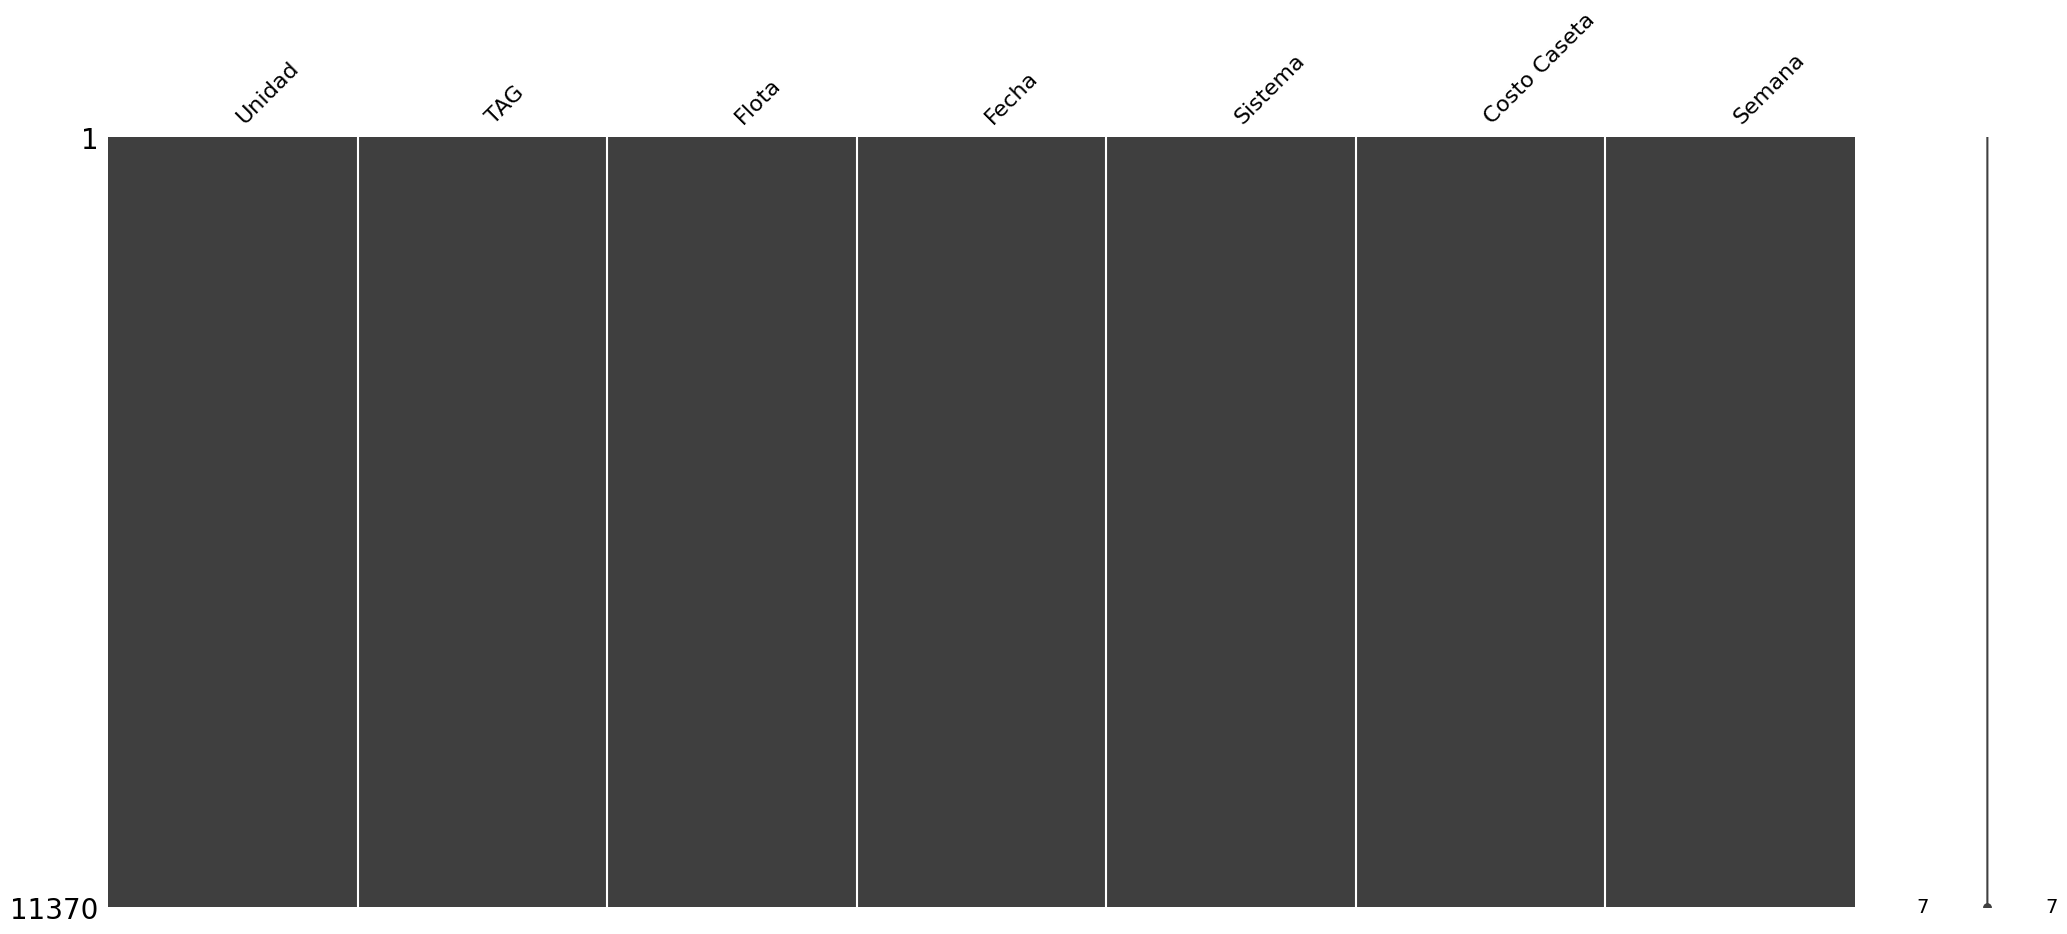

In [13]:
msno.matrix(df)

Con esto vemos que no tenemos ningún registro faltante, lo que es bueno.

## Reestablecer indices

No es necesario en este caso restablecer indices ya que no tenemos ningun registro que pueda fungir como id

## Datos atípicos

En esta parte unicamnte vamos a analizar la columna de precio, ya que no tiene sentido analizar los demas

## Identificar valores faltantes y eliminarlos o imputarlos según la naturaleza de la omisión. Justificar cada caso

Esto se hizo en los primeros pasos, donde filtarmos unicamente los valores de liverpool

## Detectar valores atípicos para su posterior transformación.

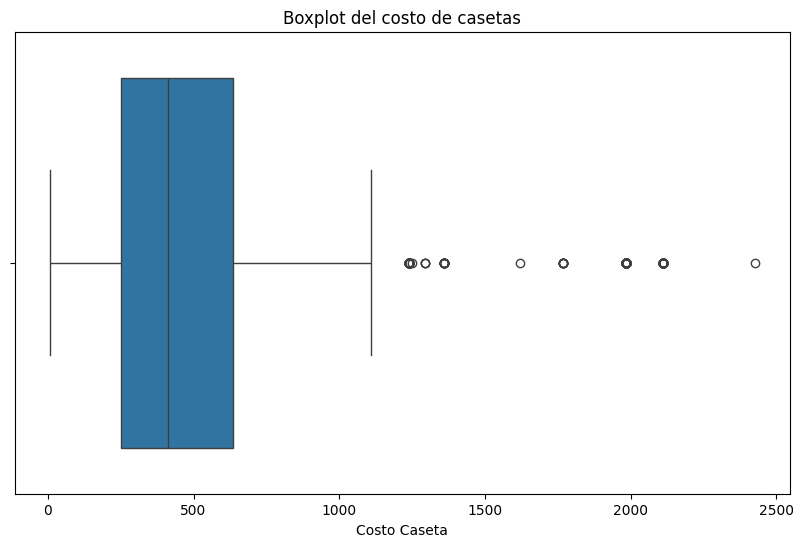

In [14]:
#sacamos el boxplot de la columna precio 

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Costo Caseta'])
plt.title('Boxplot del costo de casetas')
plt.show()

In [15]:
df['Costo Caseta'].describe()

count    11370.000000
mean       442.891557
std        306.246280
min          8.000000
25%        251.000000
50%        414.000000
75%        636.000000
max       2425.000000
Name: Costo Caseta, dtype: float64

Realmente la distribución de los valores se ve normal, ya que es el costo de las casetas. Lo unicó que hace un poco de ruido es el tener caseras que cuesten 8, vamos a investigar un poco mas de eso

In [16]:
#contamos cuantos registros de costo de casetas hay con valor 8

df[df['Costo Caseta'] == 8].shape[0] #Solo hay uno 

#Traemos esos registros

df[df['Costo Caseta'] == 8]

,Unidad,TAG,Flota,Fecha,Sistema,Costo Caseta,Semana
45770,1897,OHLM01632790,Full Liver,2024-02-09,Televia,8.0,6


Podemos ver que unicamnete tenemos un registro con el valor atípico, por lo que será importante no borrarlo y mantenerlo bajo observación en caso de que sea un error.

# Resumen
Esto nos ayudo a identificar que no hubiera valores raros o faltantes en el costo de las casetas, eliminamos columnas que no nos era útiles y detectamos dos casos de costo 0, pero no alteramos mas la información ya que se ve bien.